In [88]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import math
%matplotlib inline
arrival=ctrl.Antecedent(np.arange(0,11,1),'arrival')
queue=ctrl.Antecedent(np.arange(0,11,1),'queue')
density=ctrl.Consequent(np.arange(0,11,1),'density')
arrival['almost']=fuzz.trimf(arrival.universe,[0,0,4])
arrival['few']=fuzz.trimf(arrival.universe,[0,4,8])
arrival['many']=fuzz.trimf(arrival.universe,[2,6,10])
arrival['too_many']=fuzz.trimf(arrival.universe,[6,10,10])

F:\anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


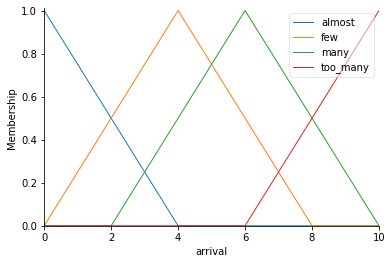

In [89]:
arrival.view()    #viewing our arrival 

F:\anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


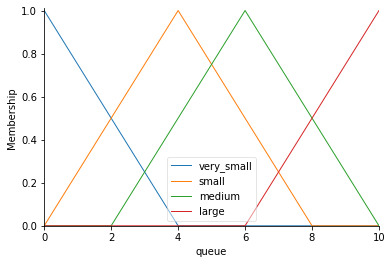

In [90]:
queue['very_small']=fuzz.trimf(queue.universe,[0,0,4])
queue['small']=fuzz.trimf(queue.universe,[0,4,8])
queue['medium']=fuzz.trimf(queue.universe,[2,6,10])
queue['large']=fuzz.trimf(queue.universe,[6,10,10])
queue.view()

F:\anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


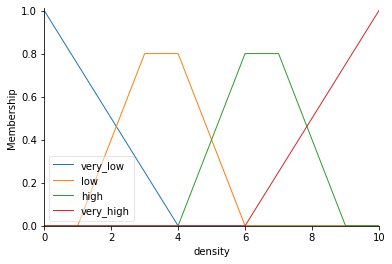

In [91]:
density['very_low']=fuzz.trimf(density.universe,[0,0,4])
density['low']=fuzz.trimf(density.universe,[1,3.5,6])
density['high']=fuzz.trimf(density.universe,[4,6.5,9])
density['very_high']=fuzz.trimf(density.universe,[6,10,10])
density.view()

In [92]:
#Following are the rules For calculating the density.
density_rule1=ctrl.Rule(arrival['almost'] | queue['very_small'],density['very_low'])
density_rule2=ctrl.Rule(arrival['almost'] | queue['small'],density['low'])
density_rule3=ctrl.Rule(arrival['almost'] | queue['medium'],density['high'])
density_rule4=ctrl.Rule(arrival['almost'] | queue['large'],density['very_high'])

density_rule5=ctrl.Rule(arrival['few'] | queue['very_small'],density['very_low'])
density_rule6=ctrl.Rule(arrival['few'] | queue['small'],density['very_low'])
density_rule7=ctrl.Rule(arrival['few'] | queue['medium'],density['high'])
density_rule8=ctrl.Rule(arrival['few'] | queue['large'],density['very_high'])

density_rule9=ctrl.Rule(arrival['many'] | queue['very_small'],density['very_low'])
density_rule10=ctrl.Rule(arrival['many'] | queue['small'],density['low'])
density_rule11=ctrl.Rule(arrival['many'] | queue['medium'],density['high'])
density_rule12=ctrl.Rule(arrival['many'] | queue['large'],density['very_high'])

density_rule13=ctrl.Rule(arrival['too_many'] | queue['very_small'],density['low'])
density_rule14=ctrl.Rule(arrival['too_many'] | queue['small'],density['low'])
density_rule15=ctrl.Rule(arrival['too_many'] | queue['medium'],density['high'])
density_rule16=ctrl.Rule(arrival['too_many'] | queue['large'],density['very_high'])



F:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
F:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24ddad75548>)

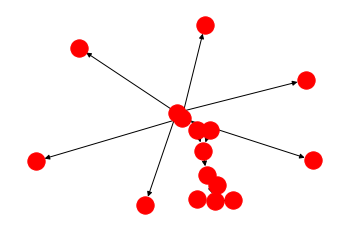

In [93]:
#Now if we view one of our density rule then
density_rule1.view() #We can see that the rule1 is now connected and if we have different value of arrival and queue the
#density will not be calculated properly so we need to formulate a system for all these fuzzy rules.

F:\anaconda\lib\site-packages\skfuzzy\control\controlsystem.py:133: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


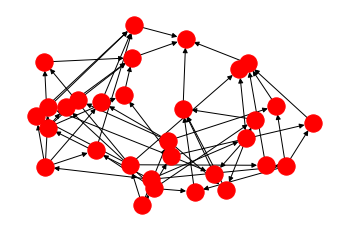

In [94]:
density_system=ctrl.ControlSystem([density_rule1,density_rule2,density_rule3,density_rule4,density_rule5,density_rule6,
                                  density_rule7,density_rule8,density_rule9,density_rule10,density_rule11,density_rule12,
                                  density_rule13,density_rule14,density_rule15,density_rule16])
density_system.view() #Now as we can see that our output of density function is very well connect for each and every value
#this means that our fuzzy system will be very much human in nature.
density_system=ctrl.ControlSystemSimulation(density_system)

In [95]:
#Now lets formulate dense value for our both ancedents using triangular membership function as we have four cases ie
#very_low, low, high and very_high we can formulates as
dense_val1=ctrl.Antecedent(np.arange(0,11,1),'dense_val1')
dense_val1['very_low']=fuzz.trimf(dense_val1.universe,[0,0,4])
dense_val1['low']=fuzz.trimf(dense_val1.universe,[1,3.5,6])
dense_val1['high']=fuzz.trimf(dense_val1.universe,[4,6.5,9])
dense_val1['very_high']=fuzz.trimf(dense_val1.universe,[6,10,10])
dense_val2=ctrl.Antecedent(np.arange(0,11,1),'dense_val2')
dense_val2['very_low']=fuzz.trimf(dense_val2.universe,[0,0,4])
dense_val2['low']=fuzz.trimf(dense_val2.universe,[1,3.5,6])
dense_val2['high']=fuzz.trimf(dense_val2.universe,[4,6.5,9])
dense_val2['very_high']=fuzz.trimf(dense_val2.universe,[6,10,10])

In [96]:
#Now lets create the extension which will be our required output . The extension is the number of extend in sec we need to 
#extend in the lane depending on arrival and queue ie if we no of vehicles in north-south lane is more than east-west lane
#then we need to extend the green light at north-south lane and vice-versa.
extension=ctrl.Consequent(np.arange(0,41,1),'extension')
extension['zero']=fuzz.trimf(extension.universe,[0,0,10])
extension['short']=fuzz.trimf(extension.universe,[0,10,20])
extension['medium']=fuzz.trimf(extension.universe,[20,30,40])
extension['larger']=fuzz.trimf(extension.universe,[30,40,40])

In [97]:
#Lets formulate the rules for extension of our system as input are 2 and each as 4 cases of no of rules is 16. 
extRule1=ctrl.Rule(dense_val1['very_low'] | dense_val2['very_low'],extension['zero'])
extRule2=ctrl.Rule(dense_val1['very_low'] | dense_val2['low'],extension['short'])
extRule3=ctrl.Rule(dense_val1['very_low'] | dense_val2['high'],extension['medium'])
extRule4=ctrl.Rule(dense_val1['very_low'] | dense_val2['very_high'],extension['larger'])

extRule5=ctrl.Rule(dense_val1['low'] | dense_val2['very_low'],extension['zero'])
extRule6=ctrl.Rule(dense_val1['low'] | dense_val2['low'],extension['zero'])
extRule7=ctrl.Rule(dense_val1['low'] | dense_val2['high'],extension['short'])
extRule8=ctrl.Rule(dense_val1['low'] | dense_val2['very_high'],extension['larger'])

extRule9=ctrl.Rule(dense_val1['high'] | dense_val2['very_low'],extension['short'])
extRule10=ctrl.Rule(dense_val1['high'] | dense_val2['low'],extension['medium'])
extRule11=ctrl.Rule(dense_val1['high'] | dense_val2['high'],extension['short'])
extRule12=ctrl.Rule(dense_val1['high'] | dense_val2['very_high'],extension['larger'])

extRule13=ctrl.Rule(dense_val1['very_high'] | dense_val2['very_low'],extension['larger'])
extRule14=ctrl.Rule(dense_val1['very_high'] | dense_val2['low'],extension['medium'])
extRule15=ctrl.Rule(dense_val1['very_high'] | dense_val2['high'],extension['short'])
extRule16=ctrl.Rule(dense_val1['very_high'] | dense_val2['very_high'],extension['zero'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24ddab94048>)

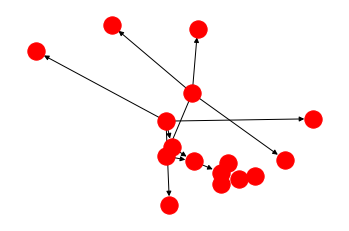

In [98]:
#lets view single rule
extRule1.view()

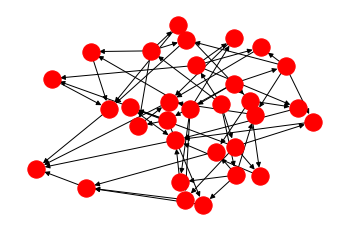

In [99]:
#Now lets create the extension rule system and view it.
extension_system=ctrl.ControlSystem([extRule1,extRule2,extRule3,extRule4,extRule5,extRule6,extRule7,extRule8,extRule9,extRule10,extRule11,extRule12,extRule13,extRule14,extRule15,extRule16])
extension_system.view()
extension_system=ctrl.ControlSystemSimulation(extension_system)

Enter arrival data and queue value for North Lane
1 3 
North density value:  5.0
Enter arrival data and queue value for South Lane
2 3
South density value:  4.595129985754986
Enter arrival data and queue value for East Lane
2 3
East density value:  4.595129985754986
Enter arrival data and queue value for West Lane
2 3
West density value:  4.595129985754986
New Values are
Extended Value 21
North-South Lane 46
East-West_Lane 25


F:\anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


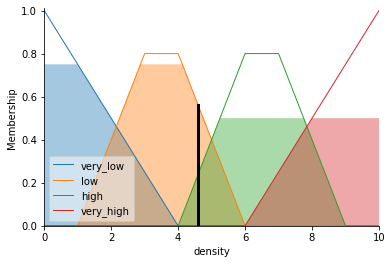

In [100]:
#Now lets give input to our fuzzy system in real life the inputs will be given on the basis on sensors that will be 
#embedded on our traffic light and sensor will see how much vehicles are at arrival and how much at queue.

ns=25 #Lets give intiallly the time at north-south lane as 25
ew=25 # Similarily for east-west lane
print("Enter arrival data and queue value for North Lane") #Taking input for arrival and queue from north lane.
n=list(map(int,input().split())) 
density_system.input['arrival']=n[0]#passing arrival to density at arrival
density_system.input['queue']=n[1] # passing queue to density at queue
density_system.compute() #calling for density system
north_val=density_system.output['density'] #storing the output of density oat north lane in var.
print("North density value: ",north_val)#printing val at north.
print("Enter arrival data and queue value for South Lane") #doing same with south,east,west.
s = list(map(int, input().split()))
density_system.input['arrival'] = s[0]
density_system.input['queue'] = s[1]
density_system.compute()
south_val = density_system.output['density']
print("South density value: ", south_val)
ns_sum=((north_val+south_val))#as the north-south lane are a straight so we cal the density sum for both the lane.
print("Enter arrival data and queue value for East Lane")
e = list(map(int, input().split()))
density_system.input['arrival'] = e[0]
density_system.input['queue'] = e[1]
density_system.compute()
east_val = density_system.output['density']
print("East density value: ", east_val)#Simlarily for east-west lane.
print("Enter arrival data and queue value for West Lane")
w = list(map(int, input().split()))
density_system.input['arrival'] = w[0]
density_system.input['queue'] = w[1]
density_system.compute()
west_val = density_system.output['density']
print("West density value: ", west_val)
density.view(sim=density_system)
ew_sum=((east_val+west_val))
extension_system.input['dense_val1']=ns_sum #Now calling our extension system and giving density at north-south lane
extension_system.input['dense_val2']=ew_sum#Simi with east-west lane.
extension_system.compute() #computing extension system.
extend_val=extension_system.output['extension'] #Our extended value.
extend_val=math.ceil(extend_val)

if(ns_sum>ew_sum): #Now if density of north-south lane is more than east-west lane then extended value is to be provided to
    #north south lane.
    ns+=extend_val
    if(ns>50):
        ns=50
else:
    #else to south-east lane.
    ew+=extend_val
    if(ew>50):
        ew=50
print("New Values are")
print("Extended Value",extend_val)
print("North-South Lane",ns)
print("East-West_Lane",ew)

## 